# APPLYING PRINCIPAL COMPONENT ANALYSIS TO MUSHROOM DATASET


## INDEX
#### 1. SUMMARY OF THE DATASET
#### 2. DATA EXPLORATION
#### 3. FIRST PCA APPROACH: IMPLEMENT STEPS MANUALLY
#### 4. SECOND PCA APPROACH - IMPLEMENT STEPS USING SCIKIT-LEARN

## 1. SUMMARY OF THE DATASET

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). 

- **cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- **cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s
- **cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
- **bruises**: bruises=t,no=f
- **odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
- **gill-attachment**: attached=a,descending=d,free=f,notched=n
- **gill-spacing**: close=c,crowded=w,distant=d
- **gill-size**: broad=b,narrow=n
- **gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
- **stalk-shape**: enlarging=e,tapering=t
- **stalk-root**: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
- **stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s
- **stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s
- **stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- **stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- **veil-type**: partial=p,universal=u
- **veil-color**: brown=n,orange=o,white=w,yellow=y
- **ring-number**: none=n,one=o,two=t
- **ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
- **spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
- **population**: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
- **habitat**: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## 2. DATA EXPLORATION

In [1]:
# Necessary modules imported.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# Mushrooms dataset used and missing values dropped.

df = pd.read_csv("mushrooms.csv").dropna()
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# Informations about the dataframe printed.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# Dimension of the dataframe interpreted.

df.shape

(8124, 23)

In [5]:
# Since all of the variables are categorical, we need to transform them. LabelEncoder used in a for loop.

class_encoder = LabelEncoder()
df["class"] = class_encoder.fit_transform(df["class"])
print('Classes: ',class_encoder.classes_)

for i in range(1,23):
    encoder = LabelEncoder()
    df.iloc[:,i] = encoder.fit_transform(df.iloc[:,i])

Classes:  ['e' 'p']


In [6]:
# Class variable dropped. 

X = df.drop(columns=['class'])
y = df['class']
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [7]:
# First 5 results of the classes printed.

y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

- Before applying PCA, data should be seperated as test set and training set.
- Parameter stratify = y used for class label distribution to remain same.
- PCA tries to maximizes the variance of the principal components. For scaling, standart scaler is used.

In [8]:
# Data splitted into test set and training set. Then, features are scaled.

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , stratify = y, random_state = 0)

scaler = StandardScaler()

X_Train_scaled = scaler.fit_transform(X_Train)
X_Test_scaled = scaler.transform(X_Test)

## 3. FIRST PCA APPROACH: IMPLEMENT STEPS MANUALLY 
- First step, covariance matrix is needed.
- Parameter rowvar setted False. Because by default this covariance function rows representing features, it should be changed  as representing columns. 

In [9]:
# Covariance Matrix 

cov_matrix = np.cov(X_Train_scaled, rowvar=False)
cov_matrix

array([[ 1.00017590e+00, -6.54497559e-02, -6.45387749e-02,
        -5.07939557e-02, -7.15453852e-03,  7.64445388e-02,
         1.96484946e-02,  6.07500373e-02, -6.93285906e-03,
         7.46255598e-02,  2.42558071e-02, -4.20844189e-02,
        -3.96045677e-02, -4.18575669e-02, -3.48461182e-02,
         0.00000000e+00,  7.45853228e-02, -1.07664231e-01,
        -3.71379544e-02, -6.49225624e-02,  6.68794476e-02,
        -4.52766076e-02],
       [-6.54497559e-02,  1.00017590e+00, -7.18675938e-03,
         6.99082707e-02,  4.72303333e-02, -3.12805581e-02,
        -2.80734152e-01,  2.07637797e-01, -1.62687843e-01,
        -1.66467544e-02, -1.17686478e-01,  7.62519359e-02,
         1.08106881e-01,  7.60838590e-02,  6.27020880e-02,
         0.00000000e+00, -1.58414005e-02, -2.50566545e-02,
        -1.11407310e-01,  2.31825003e-01,  1.91807603e-02,
         1.79227626e-01],
       [-6.45387749e-02, -7.18675938e-03,  1.00017590e+00,
         1.08374543e-02, -3.95663791e-01,  4.16686418e-02,
    

In [10]:
# Calculation of eigenvectors and eigenvalues.

eigen_vals, eigen_vects = np.linalg.eig(cov_matrix)
eigen_vals

array([3.90780817, 2.57733782, 2.38913503, 2.15898293, 1.7269653 ,
       1.39796043, 0.97958361, 0.95505337, 0.06061694, 0.07069526,
       0.12936629, 0.15661653, 0.21805917, 0.76240516, 0.70383044,
       0.31387899, 0.38164766, 0.47564714, 0.51194992, 0.57644279,
       0.54971097, 0.        ])

- As seen above, first eigen value is 3.90780817 which is the highest one. This explains most of the variance among others. It has the biggest variance.
- Percentage of explained variance can be calculated as well by summing all eigenvalues and dividing each individual value by that sum. So, how much the total variance explained can be seen.

In [11]:
# Explained Variance Calculation

total = sum(eigen_vals)
exp_var = eigen_vals/total
exp_var

array([0.18605338, 0.12270879, 0.11374833, 0.10279063, 0.08222198,
       0.06655784, 0.04663863, 0.04547073, 0.00288601, 0.00336585,
       0.00615922, 0.00745662, 0.01038194, 0.03629862, 0.03350984,
       0.01494399, 0.0181705 , 0.02264588, 0.02437428, 0.02744483,
       0.02617211, 0.        ])

In [12]:
# Cumulative Explained Variance Calculation

exp_var_cum = exp_var.cumsum()
exp_var_cum

array([0.18605338, 0.30876216, 0.42251049, 0.52530112, 0.6075231 ,
       0.67408094, 0.72071957, 0.76619031, 0.76907632, 0.77244217,
       0.77860138, 0.786058  , 0.79643995, 0.83273857, 0.86624841,
       0.8811924 , 0.8993629 , 0.92200878, 0.94638306, 0.97382789,
       1.        , 1.        ])

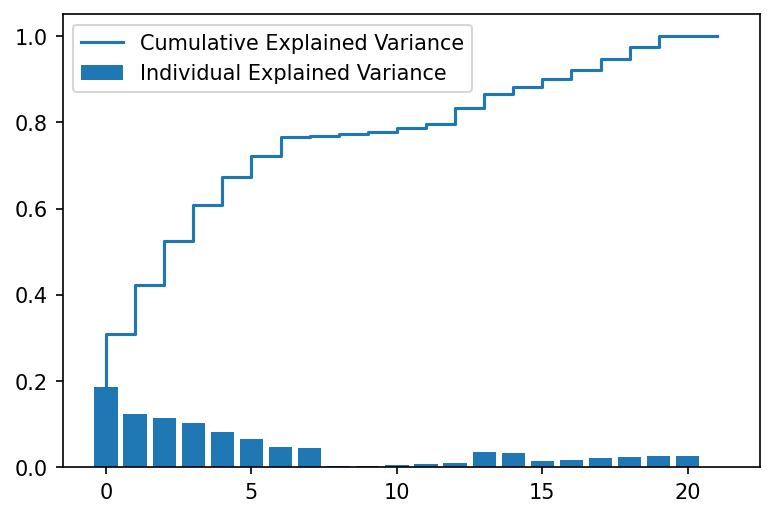

In [13]:
# Results plotted.

plt.figure(dpi=150)
plt.bar(np.arange(0,22), exp_var, label = "Individual Explained Variance")
plt.step(np.arange(0,22), exp_var_cum, label = "Cumulative Explained Variance")

plt.legend()
plt.show()

- As an instance two dimensional data wanted, which means first 2 should be chosen around 22 eigenvectors.
- First eigenvector is put in the first row, second eigenvector is put in the second row. As they wanted to be column vectors,
**.transpose()** function is used.

In [14]:
# Two dimensional data selected and transposed as columns.

W = np.array([eigen_vects[:,0], eigen_vects[:,1]]).transpose()
W.shape

(22, 2)

- By using this W, original data can be projected which gives mapped data set into two dimensional spaces.

In [15]:
# Data projected using W.

X_train_pca = X_Train_scaled.dot(W)
X_train_pca.shape

(5686, 2)

- The instances corresponding to each class have two columns. 

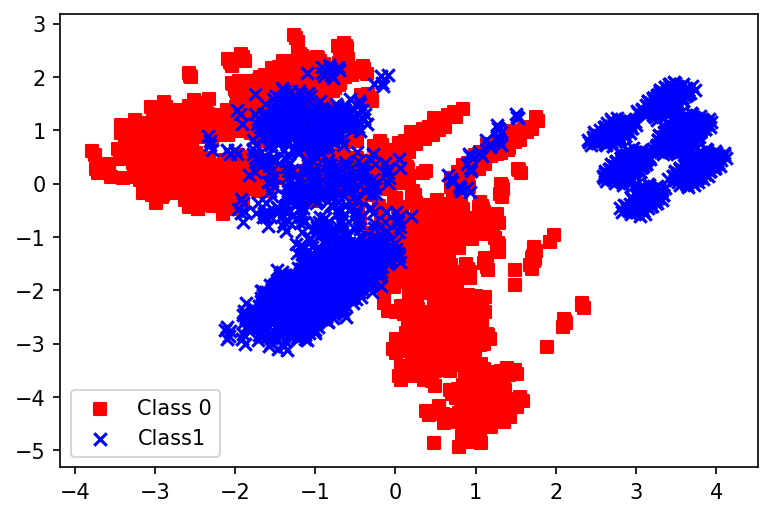

In [16]:
# Results visualized.

class_0 = X_train_pca[y_train==0]
class_1 = X_train_pca[y_train==1]

plt.figure(dpi = 150)
plt.scatter(class_0[:,0] , class_0[:,1], marker="s", color = "r")
plt.scatter(class_1[:,0] , class_1[:,1], marker="x", color = "b")

plt.legend(["Class 0" , "Class1"])

plt.show()

## 4. SECOND PCA APPROACH - IMPLEMENT STEPS USING SCIKIT-LEARN

In [17]:
# Instead of applying all the steps above, the PCA can be used.

pca = PCA(n_components=12)

X_train_pca = pca.fit_transform(X_Train_scaled)
X_test_pca = pca.transform(X_Test_scaled)

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
predictions = lr.predict(X_test_pca)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1263
           1       0.94      0.87      0.91      1175

    accuracy                           0.92      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.92      0.91      2438



**Results**
- As seen above that the model has %92 accuracy, which is good.
- According to f1-scores, model did a very good job classifying class 0 and class 1. 
- So, n_components should be chosen as 12.